# ニューラル・ネットワーク

深層学習は、2010年代以降の人工知能ブームの立役者です。
深層学習を理解するため、ニューラルネットワークと基礎原理をしっかり理解しておきましょう。

## ニューラル・ネットワークの原理

ニューラル・ネットワーク(neural network)は、人間の脳の構造を模した人工知能アルゴリズムです。

### ニューロン

人間の脳は、ニューロン(neuron)と呼ばれる神経細胞から構成されます。

ニューロンを単純化した数理モデルで考えます。

![neuron-fs8.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/f4485c8d-5f40-e478-a95f-043071b17ba6.png)


ネットワークの**重み**を$w_1, w_2, ..., w_i, ..$とすると：

__ニューロンから伝わる信号の総量__

$$
w_1 x_1 + w_2 x_2 + ... + w_i x_i + ...
$$

発火：次のニューロンに信号を伝える

入力の信号量がある閾値$\theta$を超えるかどうかで決まる

* 発火　$(w_1 x_1 + w_2 x_2 + ... + w_i x_i + ... \ge \theta)$
* 発火しない $(w_1 x_1 + w_2 x_2 + ... w_i x_i + ... < \theta)$

__(学習のイメージ）誤り訂正学習法__

入力$(x_1, x_2, ..., x_i, ...)$に対し、
ある重み$(w_1, w_2, ..., w_i, ...)$で出力$y$を計算し、
出力が誤っていたら重みを調整することで、徐々に正しい出力を出すように近づけます。


### 単純パーセプトロン

単純パーセプトロンは、ニューラルネットワークの単純な数理モデルです。

$y = f(\mathbf{w}\cdot\mathbf{x}+b)$

* 入力: $\mathbf{x} = (x_1, x_2, ..., x_n)$
* 重み: $\mathbf{w} = (w_1, w_2, ..., w_n)$
* バイアス: $b$
* 活性化関数: $f$

活性化関数は、ニューロンの発火を定める関数です。
前の説明では、ニューロンの発火を0,1で決定していました。
それを関数として表すと、次のような**ステップ関数**となります。

__ステップ関数__

$$
f(x) = \begin{cases}
    1 & (x>0) \\
    0  & (x\le0)
  \end{cases}
$$ 

しかし、
ステップ関数は、発火しそうだけどギリギリ発火しないなどの中間的な状態が表現できません。
単純関数パーセプトロンでは、ステップ関数の代わりに、
ロジスティック回帰でも用いた**標準シグモイド関数**を使うことで、
0から1の連続値を扱えるようになります。
これで、0.49のようなギリギリ発火しない状態も表現できます。

__標準シグモイド関数__
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

ちなみに、シグモイド関数が好まれる理由は、微分をしてみると、シグモイド関数の形で表されるからです。

$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

### 確率モデルの導入

シグモイド関数を用いると、確率的分類モデルになります。

* **発火する確率**: $p(C = 1 ~|~ \mathbf{x}) = \sigma(\mathbf{w} \mathbf{x} + b)$
* **発火しない確率**: $p(C = 0~|~ \mathbf{x}) = 1 - p(C = 1 ~|~ \mathbf{x}) = 1 - \sigma(\mathbf{w} \mathbf{x} + b)$

確率変数$C$は、0か1なので、$y = \mathbf{w} \mathbf{x} + b$として、
次の式にまとめられます。

$$
p(C = t | \mathbf{x}) = y^t(1-y)^{(1-t)}
$$

尤度関数(ゆうどかんすう）は、ある前提条件に従って結果が出現する場合に、逆に観察結果からみて前提条件が「何々であった」と推測する尤もらしさ（もっともらしさ）を表す数値を関数として捉えたものです。

尤度関数: $\mathbf{w}$と$b$を尤度推定するための関数

$$
L(\mathbf{w}, b) = \prod_{n=1}^{N} p(C = t_n|\mathbf{x}_n) = \prod_{n=1}^{N} y_n^{t_n}(1 - y_n)^{1-t_n}
$$

なお、突然出てきた$n=1,...,N$はデータの件数です。

### ニューラルネットワークの学習

ニューラル・ネットワークの学習は、
尤度関数$L(w, b)$を最大化するように$w$と$b$を調整することになります。

<div class="alert alert-info">

**最適化問題(optimization problem)**

関数が最大・最小となる状態を求める問題のこと。
関数の最大化は、符号を反転すると、最小化に置き換えられるので、
一般に関数を最適化するとは、関数を最小化するパラメータを求めることです。
</div>

最適化問題となれば、パラメータの偏微分（勾配）を求め、勾配が$0$になるパラメータを探します。
ただし、積の形をしているので、偏微分の計算が煩雑になります。そこで、事前の準備として、対数をとって、和の形に変形しておきます。

__交差エントロピー誤差関数(cross-entropy error function)__
$$
E(\mathbf{w}, b) = - \log{L(\mathbf{w}, b)} = - \sum_{n=1}^{N} t_n \log{y_n} + (1 - t_n)\log{1-y_n}
$$

$E(\mathbf{w}, b)$を最小化することがもともとの尤度関数の最適化になります。一般的には、$E$のことを**誤差関数(error function)**、もしくは、**損失関数(loss function)**と呼びます。








### 勾配降下法

交差エントロピー誤差関数$E(\mathbf{w},b)$を最適化するためには、$\mathbf{w}, b$で偏微分して0になるパラメータを求めることになります。しかし、解析的にこの値を求めるのは困難な場合があります。
そこで、パラメータを逐次的に更新することで、最適化を探索するアプローチがとられます。

__勾配降下法(gradient descent)__

$$
\mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} - \eta \frac{\partial E(\mathbf{w}, b)}{\partial w}　
= \mathbf{w}^{(k)} - \eta \sum_{n=1}^{N}(t_n - y_n)\mathbf{x}_n
$$

$$
b^{(k+1)} = b^{(k)} - \eta \frac{\partial E(\mathbf{w}, b)}{\partial b} 
= b^{(k)} - \eta \sum_{n=1}^N (y_n - t_n)
$$

(直感的な解釈)： 予測値と実際の値との誤差(y_n - t_n)を用いて、パラメータが更新されます。つまり、ニューラルネットワークの目標は、「予測値と実際の値」の差をなくすことなので、直感に反しない解釈となります。

<div class="alert alert-info">

学習率(learning_rate): $\eta(>0)$

学習率は、収束しやすさを調整するハイパーパラメータです。
通常は、$0.1$や$0.01$などの適当な小さい値を与えます。

</div>


<div class="alert alert-info">

ニューラル・ネットワークの数理をより深く探求したいときは

次のスライドは、大変に面白いと思います

https://www.slideshare.net/trinmu/ss-226711018

</div>



## NumPyによる原理の確認

NumPyを使って、単純パーセプトロンの原理を実装しながら確認していきましょう。

<div class="alert alert-warning">

数式も理解するためには

少しPythonを使ってコーディングしてみると、理解が深まります。
(NumPyの練習にもなりますし。)

</div>



In [1]:
import matplotlib.pyplot as plt
import numpy as np


### 活性化関数

まず、活性化関数をステップ関数とシグモイド関数を比較してみましょう。

__ステップ関数__

$$
f(x) = \begin{cases}
    1 & (x>0) \\
    0  & (x\le0)
  \end{cases}
$$



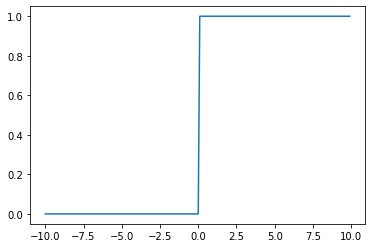

In [2]:
def step(x):
    return 1 if x > 0 else 0

step = np.frompyfunc(step, 1, 1) # ユニバーサル関数へ変換

x = np.arange(-10, 10, 0.1)
y = step(x)

plt.plot(x, y)


__標準シグモイド__

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$


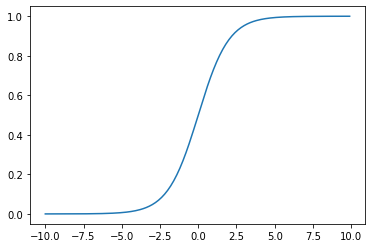

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.plot(x, y)


### 勾配降下法

**勾配降下法(GD)**は、関数$f(x)$があったとき、$f(x)$を最小にするような$x$(${\mathop{\rm arg~max}\limits}_{x}　f(x)$とも書く)を求める手法です。
最急降下法（Gradient descent, steepest descent）と呼ばれることもあります。

__原理__
$$
x_{i+1} = x_i - \eta f'(x_i)\\
(x_{i+1}, y_{i+1}) = (x_i, y_i) - \eta (\frac{\partial f(x_i, y_i)}{\partial x_i}, \frac{\partial f(x_i, y_i)}{\partial y_i})
$$

* $f'(x_i), \frac{\partial f(x_i, y_i)}{\partial x_i}, \frac{\partial f(x_i, y_i)}{\partial y_i}$: 勾配
* $\eta$: 学習率（ハイパーパラメータ）

__1変数の場合__

例として、次の簡単な放物線を考えることにします。

$$
f(x) = 3x^4 −4x^3 −12x^2 +3\\
f'(x) = 12x^3 − 12x^2 − 24x \\
$$


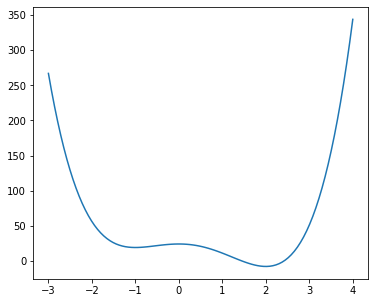

In [4]:
def f(x):
    return 3 * x**4 - 4 * x**3 - 12 * x**2 + 24

def df(x):
    return 12* x**3 - 12* x**2 - 24*x

def show_grad2():
    x = np.linspace(-3, 4, 100)
    y = f(x)
    plt.figure(figsize=(6,5))
    plt.plot(x, y)

show_grad2()


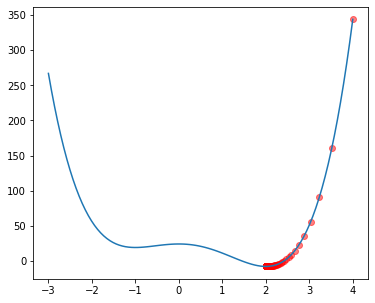

In [5]:
eta = 0.001   # 学習率

x  = np.zeros(100)
x[0] = 4  # 初期値
for i in range(len(x)-1):
    x[i+1] = x[i] - eta * df(x[i])  # 勾配降下法

show_grad2()
plt.scatter(x, f(x), c='red', alpha=0.5)


<div class="alert alert-info">
大域最適性と局所最適性

局所最適性とは、最適解のひとつであるが、必ずしも最小にならないこと。
（最小となる最適解を大域最適解と呼ぶ。）
</div>

勾配降下法は、大域最小性は保証されません。例えば、上の例でも初期値を$x=-3$で始めると、局所最適解に収束してしまいます。学習率などを変更して、山を超えるように調整することもできます。
ただし、機械学習では調整するパラメータの数が多いので、多少、局所最適解になるパラメータがあっても、計算の効率が優先されます。





__2変数の場合__

$$
z = x^2 + y^2 ~~~
\frac{\partial z}{\partial x} = 2x ~~\frac{\partial z}{\partial y} = 2y 
$$ 




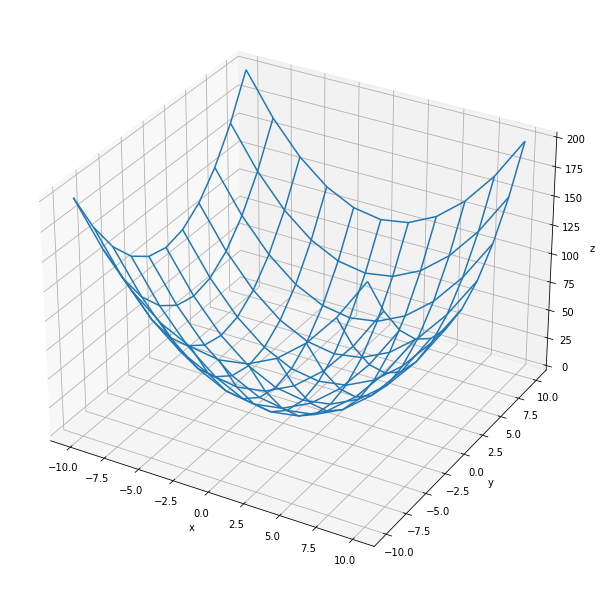

In [6]:
from mpl_toolkits.mplot3d import Axes3D
 
def f(x, y):
    z = x ** 2 + y ** 2
    return z

def show_grads():
    fig = plt.figure(figsize=(8,8))
    ax1 = Axes3D(fig)
    x = np.arange(-10, 11, 2)
    y = np.arange(-10, 11, 2)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    
    ax1.plot_wireframe(X, Y, Z, label='f(x, y)')
    return ax1

show_grads()
plt.show()

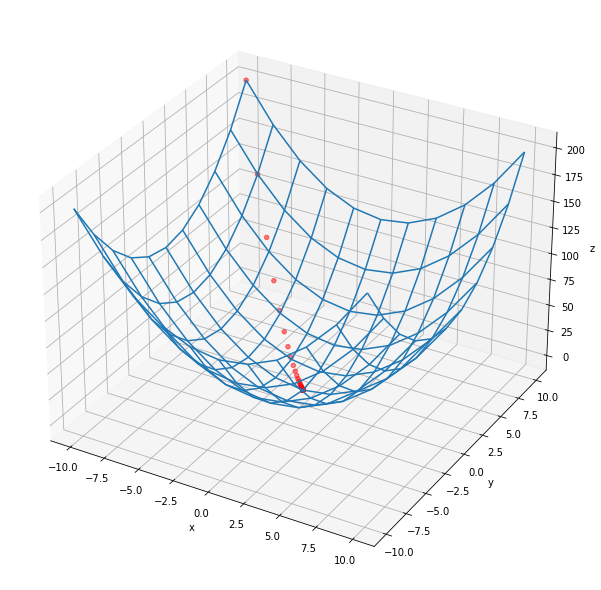

In [7]:
x = np.zeros(100)
y = np.zeros(100) 
x[0] = -10  # 初期値
y[0] = 10  # 初期値

def dfdx(x):
    return 2 * x

def dfdy(y):
    return 2 * y

eta = 0.1   # 学習率
for i in range(len(x)-1):
    x[i+1] = x[i] - eta * dfdx(x[i])  # 勾配降下法
    y[i+1] = y[i] - eta * dfdy(y[i])  # 勾配降下法

ax1 = show_grads()
ax1.scatter3D(x, y, f(x, y), c='red', alpha=0.5)
plt.show()

最先端のニューラルネットワークでは、勾配降下法に完成項(momentum)を追加させた手法、さらに適応的に学習率を変更するAdaGradが使われています。

* 勾配降下法(GD): $\mathbf{x}_{i+1} = \mathbf{x}_i - \eta \nabla f$
* Momentum: $\mathbf{x}_{i+1} = \mathbf{x}_i - \eta \nabla f+ \alpha \Delta \mathbf{w}$
* AdaGrad: $\mathbf{x}_{i+1} = \mathbf{x}_i - \eta \frac{1}{\sqrt{h_i}}\nabla f$,
   $h_{i+1} = h_i +  (\nabla f)^2$


<img src="https://watlab-blog.com/wp-content/uploads/2020/03/gd-momentum-adagrad.gif" width="50%"/>

[wat氏のわかりやすい解説](https://watlab-blog.com/2020/03/08/adagrad/)より引用

## 単純パーセプトロンの原理

単純パーセプトロンの動作原理を確認していましょう。

__サンプルデータ__

|$x_1$|$x_2$|t|
|-----|-----|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

### 入力(x)と出力(y)


In [8]:
x = np.array([[0, 0], [0, 1], [1,0], [1,1]])
t = np.array([0, 1, 1, 1])
print('x.shape', x.shape)
print('t.shape', t.shape)

x.shape (4, 2)
t.shape (4,)


In [9]:
DIM = x.shape[1]  #2
w = np.random.normal(size=(DIM,))
b = 0
print('w =', w)
print('b =', b)

w = [-0.44617575  0.38226703]
b = 0


### ニューロンの数理モデル

次は、ニューロンのモデルを計算してみましょう。
$$
y = \mathbf{w} \mathbf{x}^T + b
$$

今回の入力は、４回分の入力が$\mathbf{x}$に入っています。
これをバッチ処理として、一回で計算してしまいます。

<div class="alert alert-info">
バッチ処理

複数の入力データをまとめて計算すること。
（GPUの性能を引き出すときに必須のテクニックです。）
</div>

In [10]:
y = np.matmul(w, x.T) + b
print('y = ', y)

y =  [ 0.          0.38226703 -0.44617575 -0.06390872]


活性化関数を適用して、[0.0, 1.0]の範囲にします。

In [11]:
y = sigmoid(np.matmul(w, x.T)+b)
print('y = ', y)

y =  [0.5        0.59441977 0.3902704  0.48402826]


### 学習モデル

ニューラルネットワークは、誤差を少なくするようにパラメータ（重み）を調整することで、学習します。

$y$は、ニューロンから予想された出力になります。ここから正解$t$との差分を計算します。

In [12]:
delta = y - t
delta 

array([ 0.5       , -0.40558023, -0.6097296 , -0.51597174])

勾配降下法で1ステップだけ進めてみましょう。

$$
\mathbf{w}^{(k+1)} = = \mathbf{w}^{(k)} - \eta \sum_{n=1}^{N}(t_n - y_n)\mathbf{x}_n\\
b^{(k+1)} == b^{(k)} - \eta \sum_{n=1}^N (y_n - t_n)
$$

積の和を`np.matmul()`を使って一度に計算しています。


In [13]:
eta = 0.1  # 学習率

print('BEFORE')
print('w =', w)
print('b =', b)
print('delta =', delta)
dw = np.matmul(x.T, delta)
db = delta.sum()
w = w - eta * dw
b = b - eta * db
print('w =', w)
print('b =', b)


BEFORE
w = [-0.44617575  0.38226703]
b = 0
delta = [ 0.5        -0.40558023 -0.6097296  -0.51597174]
w = [-0.33360561  0.47442222]
b = 0.10312815795821506


損失関数は、交差エントロピー誤差から計算します。
$$
E(\mathbf{w}, b) = - \sum_{n=1}^{N} t_n \log{y_n} + (1 - t_n)\log{1-y_n}
$$

In [14]:
def compute_loss(t, y):
    return (-t * np.log(y) - (1 - t)*np.log(1-y)).sum()

compute_loss(t, y)

2.8798441566860675

### エポック(epoch)

何回か繰り返し計算することで誤差が小さく収束していきます。


y[1]= [0.50752788 0.62974618 0.86342404 0.91253912] loss[1] 1.4091295317036505
y[6]= [0.51019507 0.71891883 0.88585086 0.95013865] loss[6] 1.2161089046643379
y[11]= [0.48862562 0.76099054 0.89251596 0.96511954] loss[11] 1.0930018548716502
y[16]= [0.46066769 0.78669183 0.89492895 0.97352857] loss[16] 0.995181106687431
y[21]= [0.4322263  0.805267   0.89619061 0.97912107] loss[21] 0.9133158613216121
y[26]= [0.40540246 0.82010343 0.89732886 0.98317538] loss[26] 0.8434959439212844
y[31]= [0.38084255 0.83262494 0.89867666 0.98625075] loss[31] 0.7832442968588098
y[36]= [0.3586118  0.84350989 0.90030565 0.98864412] loss[36] 0.7307458503091289
y[41]= [0.33855443 0.85312782 0.90219015 0.9905373 ] loss[41] 0.6846112082276821
y[46]= [0.32044591 0.86170934 0.90427376 0.99205254] loss[46] 0.6437580612391854
y[51]= [0.30405586 0.86941615 0.9064965  0.99327685] loss[51] 0.6073332350454044
y[56]= [0.28917204 0.87637157 0.90880503 0.9942743 ] loss[56] 0.5746568096002935
y[61]= [0.27560752 0.88267474 0.9

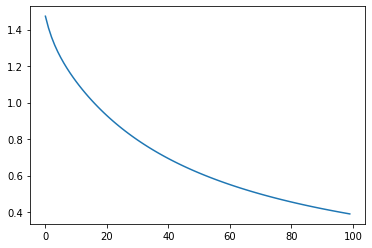

In [15]:
x = np.array([[0, 0], [0, 1], [1,0], [1,1]])
t = np.array([0, 1, 1, 1])

np.random.seed(0) #乱数を固定
w = np.random.normal(size=(x.shape[1],)) # 初期の重み
b = 0

def forward(y):
    return sigmoid(np.matmul(w, x.T) + b)

eta = 0.2
epoch = 100
yloss = []
for i in range(epoch):
    y = forward(x)
    delta = y - t
    w = w - eta * np.matmul(x.T, delta)
    b = b - eta * delta.sum()
    loss = compute_loss(t, y)
    if i % 5 == 1:
        print(f'y[{i}]=', y, f'loss[{i}]', loss)
    yloss.append(loss) # グラフ描画用

print(f'最終予測結果: ', y, 'loss:', loss)
print('正解: ', t)
print('w =', w, 'b =', b)
plt.plot(range(epoch), yloss)


エポック100回の予測結果と正解を比べてみると、0.5を境界にして、0と1に分類すれば、正解と等しい予測が得られています。まだ、loss が大きいので、もう少しエポックを増やして学習させることでより明確な結果が得られます。

## 多層パーセプトロンと深層学習

単純パーセプトロンは、原理的にロジスティック回帰と等価です。
（実装で頑張っても）**線形分離可能な問題**しか解くことができません。

<div class="alert alert-info">

**線形分離可能な問題**

幾何学においてふたつの集合が二次元平面上にあるとき、それらの集合を一本の直線で分離できることです。

__線形分離可能な例__

<img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/1dd6e067-1875-27a8-fbf4-e81158f54719.png" width="40%"/>

一般化して、$n$ 次元空間上のふたつの集合を $n − 1$ 次元の超平面で
分離できることも線形分離可能と呼びます。
逆に、線形分離不可能な問題を線形分離不可能問題と呼びます。

</div>

### 線形分離不可能な問題

線形分離不可能な問題は、日常的に存在します。例えば、論理回路のXOR回路も設計分離不可能です。

|$x_1$|$x_2$|t|
|-----|-----|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

__線形分離不可能な例__

赤い部分が分離できていない。

<img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/db9d8fa2-05e1-6dd5-e3ef-09582a1b0b1b.png" width="40%"/>

<div class="alert alert-info">

Let's try

単純パーセプトロンの実装コードを使って、線形不分離問題を解こうとするとどうなるか調べてみよう。

</div>



### 多層パーセプトロン

線形分離不可能な問題を解くためのアイディアは、パーセプトロンを組み合わせて多層化することです。

__３層パーセプトロンの例__

<img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/1c2f261f-701d-e020-2f49-c3df596b8363.png" width="60%">

このように多層化することで、各ニューロンの学習結果が組み合わさって、
線形分離不可能な問題でも複数の分離線の組み合わせで分離可能になります。

<img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/5ce7c474-466c-7889-f3d4-19277c815289.png" width="40%"/>

さて、「多層パーセプトロンも実装してみましょう！」としたいところですが、
ちょっと１回の講義では多すぎる気がしますので重要な概念だけ紹介しておきます。

<div class="alert alert-info">

逆誤差伝搬法

ニューロンは、順方向に発火させていきますが、学習を効率よく行うため、誤差を逆に伝搬させます。

<img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/49a140bb-5aa0-45a7-a365-7c3aa5c914b6.png" width="60%">

</div>

### 深層学習へ

多層パーセプトロンは、４層以上の局所最適解や勾配消失などの技術的な問題によって、十分に学習させられず、性能も芳しくなく、1990年代は機械学習のメインストリームから外れていました。

深層学習は、2006年に、ジェフリー・ヒントンらがオートエンコーダを提案し、多層でも十分に学習できるように改善したニューラルネットワークです。

<div class="alert alert-info">

オートエンコーダ

ニューラルネットワークを使用した次元圧縮のためのアルゴリズム

</div>

__Nature誌に掲載されたDeep Learning の発明者らの論文__

https://www.cs.toronto.edu/~hinton/absps/NatureDeepReview.pdf

![deep1-fs8.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/ebc23dd0-544b-7b72-185e-510a584aae8b.png)

![deep2-fs8.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/49663032-edde-3f61-c00b-cc1dcf5d0704.png)



## コースワーク

今回は、少々難解な数式が出て、コードも「とっ散らかった」感じになってしまいました。
このようなコードは、ライブラリとしてまとめておくと、再利用しやすくなります。


<div class="admonition tip">

**演習（SinglePerceptron クラス）**

Python 言語のクラスを定義を使って、
単純パーセプトロンのコードを
sklearn 風に学習と予測ができるようにまとめてみましょう。

モデル生成：
```
model = SinglePerceptron(lerning_rate=0.1)
```

学習：
```
model.fit(X, y)
```

予測：
```
y_pred = model.predict(X)
```

</div>

<div class="alert alert-warning">

コースワークについて

今回のコースワークは、
**オブジェクト指向プログラミング（計算機数学II)の復習**です。

オブジェクト指向プログラミングを用いると、複数のパラメータをひとまとまりにして、
より複雑な深層学習向けのニューラルネットワークが構築しやすくなります。
本格的に深層学習に進みたいときは、避けては通れませんので、
クラス、オブジェクト、メソッドの概念をもう一度復習してみてください。

</div>